In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from celluloid import Camera
from IPython.display import HTML




In [3]:
def visualize_transformation(matrix, plot_title, show=True):
    """
    Plots the linear transformation given by the specified matrix
    """
    plt.axis("equal")
    ax = plt.gca() #fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", scale = 1)

    if show:
        plt.show()

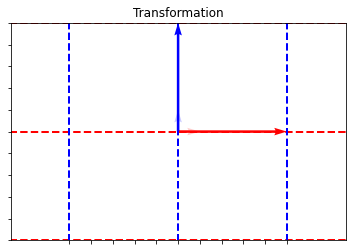

In [4]:
fig = plt.figure()
camera = Camera(fig)


def animate(theta, scale):
    rot_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    scale_matrix = np.array([
      [scale, 1, 0],
      [0, scale, 0],
      [0, 0, 1]
    ])
    
    matrix = scale_matrix * rot_matrix

    
    visualize_transformation(matrix, "Transformation", False)
    camera.snap()


rotations = np.linspace(0, -2*np.pi, 50)
scales = np.linspace(1, 5, 50)
for theta, scale in zip(rotations, scales):
    animate(theta, scale)

animation = camera.animate()
animation.save("test.gif")

HTML(animation.to_html5_video())